# Importing and Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
""" Please run appropriate command to import the file."""

# with open("/content/drive/MyDrive/Syracuse University/IST 664 Natural Language Processing/Assignment 1/clothing_shoes_jewelry.txt",'r') as f:
#   txt = f.read()

with open('/drive/My Drive/Colab Notebooks/Mon_Homework1/clothing_shoes_jewelry.txt', 'r') as f:
  txt = f.read() 

In [ ]:
txt_split = txt.split("\n\n")

In [ ]:
txt_split = txt_split[:-1]

In [ ]:
txt_chunks = [tuple(t.split("\n")) for t in txt_split]

In [ ]:
txt_dict = []
for i in txt_chunks:
    txt_dict.append(dict(tuple(t.split(":",maxsplit=1)) for t in i))

In [ ]:
df = pd.DataFrame(txt_dict)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [ ]:
assert (df.groupby("reviewerID").size()>=5).all(), "Check Again! Minimum Reviews per user should be 5"

In [ ]:
assert (df.groupby("asin").size()>=5).all(), "Check Again! Minimum Reviews per item should be 5"

In [ ]:
df.shape

(278677, 9)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette = "crest_r")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


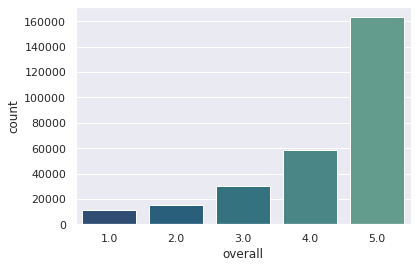

In [ ]:
sns.countplot(df.overall,order=sorted(df.overall.unique()))

In [ ]:
df.unixReviewTime = pd.to_datetime(df.unixReviewTime, unit='s')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


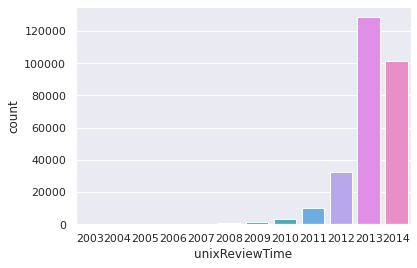

In [ ]:
sns.countplot(df.unixReviewTime.dt.year, order = sorted(df.unixReviewTime.dt.year.unique()))

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,2011-02-12,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,2013-01-19,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,2013-01-04,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",2014-04-27,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,2014-03-15,"03 15, 2014"


In [ ]:
import nltk

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# pos tagging, then joining.
# df.reviewText = df.reviewText.str.lower()
# df['reviewText_pt'] = df.reviewText.apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)), tagset = 'universal')

In [ ]:
summary_all = " ".join(df.summary)
reviewText_all = " ".join(df.reviewText)

In [ ]:
print(summary_all[:100])
print(reviewText_all[:100])

Great tutu-  not cheaply made Very Cute!! I have buy more than one Adorable, Sturdy Grammy's Angels 
This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked


# Start of Tasks

Things to do 
1. list the top 50 words by frequency 
2. list the top 50 bigrams by frequencies, and
3. list the top 50 bigrams by their Mutual Information scores (using min frequency 5)
4. list the top 50 content words in the context of the word “jewelry” in the reviewTexts. Please explain how you define the context in your study
5. list the top 50 content words in the context of the word “toy” appeared in the reviewTexts for each overall rating (e.g., overall rating: 1.0, top 50 content words are: …..; overall rating 2.0: top 50 content words are ….)


## Task 1
Techniques Performed : Pos Tagging , Lemmatization, Tokenization 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
summary_tk = nltk.word_tokenize(summary_all)
# reviewText_tk = nltk.word_tokenize(reviewText_all)

In [ ]:
summary_tk = nltk.pos_tag(summary_tk)
# reviewText_tk = nltk.pos_tag(reviewText_tk)

In [ ]:
# reviewText_tk = []
# for num, i in enumerate(df.reviewText.values, start = 1):
#   if num%100000 == 0: print(f"{num} iterations done")
#   reviewText_tk_tmp = nltk.word_tokenize(i)
#   reviewText_tk.extend(reviewText_tk_tmp)

In [ ]:
# nltk.word_tokenize(" ".join(df.iloc[0:100000].reviewText.values))

In [ ]:
len(" ".join(df.iloc[0:1000].reviewText.values))

363775

In [ ]:

df.shape[0]//1000

278

In [ ]:
start = 0
end = 100
len_df_rt = df.shape[0]
reviewText_tk = []
# reviewText_tk_for_df = []
while start != end :
  if start%100000 == 0:
    print(f"{start} :: {end}")
  reviewText_tk_tmp = " ".join(df.iloc[start:end].reviewText.values)
  reviewText_tk_tmp = nltk.word_tokenize(reviewText_tk_tmp)
  reviewText_tk_tmp = nltk.pos_tag(reviewText_tk_tmp)
  reviewText_tk.extend(reviewText_tk_tmp)
  # reviewText_tk_for_df.append(reviewText_tk_tmp)
  start = end 
  end += 100
  if end >= len_df_rt :
    end = len_df_rt + 1

0 :: 100
100000 :: 100100
200000 :: 200100


In [ ]:
# Number of Tokenized words for reviewText
len(reviewText_tk)

19230762

In [ ]:
# Number of Tokenized workds for summary
len(summary_tk)

1173737

In [ ]:
len(reviewText_all.split(" "))

17058314

In [ ]:
len(summary_all.split(" "))

1025593

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
reviewText_tk[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('tutu', 'NN'),
 ('and', 'CC'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('really', 'RB'),
 ('great', 'JJ')]

In [ ]:
freq_summary = nltk.FreqDist(summary_tk)
freq_reviewText = nltk.FreqDist(reviewText_tk)

In [ ]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
all_english_words = set(nltk.corpus.words.words())

In [ ]:
summary_tk_nsw = [(i.lower(),j) for i,j in summary_tk]
reviewText_tk_nsw = [(i.lower(),j) for i,j in reviewText_tk]

In [ ]:
summary_tk_nsw = [(lemmatizer.lemmatize(i),j) for i,j in summary_tk_nsw]
reviewText_tk_nsw = [(lemmatizer.lemmatize(i),j) for i,j in reviewText_tk_nsw]

In [ ]:
summary_tk_nsw = [(i,j) for i,j in summary_tk_nsw if i not in stop_words and i in all_english_words]
reviewText_tk_nsw = [(i,j) for i,j in reviewText_tk_nsw if i not in stop_words and i in all_english_words]

In [ ]:
freq_summary = nltk.FreqDist(summary_tk_nsw)
freq_reviewText = nltk.FreqDist(reviewText_tk_nsw)

In [ ]:
summary_tk_nsw = [i for i in summary_tk_nsw if (i not in stop_words) & (len(i) > 3)]
reviewText_tk_nsw = [i for i in reviewText_tk_nsw if (i not in stop_words) & (len(i) > 3)]

In [ ]:
print(freq_summary.most_common(50))

[(('great', 'NNP'), 22216), (('great', 'JJ'), 11343), (('good', 'JJ'), 11268), (('nice', 'NNP'), 10942), (('love', 'NNP'), 9192), (('comfortable', 'JJ'), 8639), (('nice', 'JJ'), 6712), (('love', 'VB'), 5401), (('cute', 'NNP'), 5378), (('small', 'JJ'), 5367), (('shoe', 'NNS'), 5313), (('perfect', 'NNP'), 4975), (('quality', 'NN'), 4948), (('price', 'NN'), 4940), (('good', 'NNP'), 4729), (('size', 'NN'), 4341), (('shoe', 'NN'), 4330), (('like', 'IN'), 4135), (('fit', 'NN'), 4041), (('beautiful', 'NNP'), 3650), (('love', 'VBP'), 3615), (('fit', 'NNP'), 3464), (('little', 'JJ'), 3133), (('watch', 'NN'), 3106), (('cute', 'NN'), 3066), (('shoe', 'NNP'), 3013), (('cute', 'JJ'), 3001), (('shirt', 'NN'), 2750), (('well', 'RB'), 2488), (('pretty', 'NNP'), 2482), (('big', 'JJ'), 2422), (('looking', 'VBG'), 2401), (('pretty', 'RB'), 2383), (('product', 'NN'), 2368), (('comfortable', 'NNP'), 2326), (('comfy', 'NNP'), 2276), (('color', 'NN'), 2274), (('bra', 'NN'), 2145), (('wa', 'VBD'), 2071), (('a

In [ ]:
print(freq_reviewText.most_common(50))

[(':', 19390216), (' ', 19230761), ('N', 8803953), ('e', 8250836), ('t', 6804419), ('a', 5311979), ('P', 5270108), ('o', 5168333), ('i', 5109046), ('B', 4638504), ('s', 4384926), ('r', 3936165), ('n', 3810699), ('h', 3753603), ('R', 3579287), ('J', 3379512), ('V', 3204439), ('l', 3118420), ('D', 2993605), ('.', 2436620), ('d', 2426524), ('T', 2207407), ('C', 1946603), ('u', 1899389), ('c', 1713469), ('I', 1678980), ('m', 1651877), ('y', 1650887), ('w', 1494995), ('f', 1483088), ('g', 1461600), ('p', 1219864), ('b', 1216929), (',', 1155412), ('S', 775650), ('v', 756852), ('k', 722344), ('Z', 590763), ("'", 389611), ('O', 388036), ('$', 293570), ('G', 263869), ('M', 254782), ('W', 189707), ('z', 156413), ('!', 151459), ('x', 129729), ('j', 126088), (')', 120792), ('-', 118808)]


In [ ]:
freq_reviewText.most_common(50)

[(':', 19390216),
 (' ', 19230761),
 ('N', 8803953),
 ('e', 8250836),
 ('t', 6804419),
 ('a', 5311979),
 ('P', 5270108),
 ('o', 5168333),
 ('i', 5109046),
 ('B', 4638504),
 ('s', 4384926),
 ('r', 3936165),
 ('n', 3810699),
 ('h', 3753603),
 ('R', 3579287),
 ('J', 3379512),
 ('V', 3204439),
 ('l', 3118420),
 ('D', 2993605),
 ('.', 2436620),
 ('d', 2426524),
 ('T', 2207407),
 ('C', 1946603),
 ('u', 1899389),
 ('c', 1713469),
 ('I', 1678980),
 ('m', 1651877),
 ('y', 1650887),
 ('w', 1494995),
 ('f', 1483088),
 ('g', 1461600),
 ('p', 1219864),
 ('b', 1216929),
 (',', 1155412),
 ('S', 775650),
 ('v', 756852),
 ('k', 722344),
 ('Z', 590763),
 ("'", 389611),
 ('O', 388036),
 ('$', 293570),
 ('G', 263869),
 ('M', 254782),
 ('W', 189707),
 ('z', 156413),
 ('!', 151459),
 ('x', 129729),
 ('j', 126088),
 (')', 120792),
 ('-', 118808)]

In [ ]:
from nltk.util import ngrams

In [ ]:
list(ngrams(freq_reviewText, 2))[:5]

[('.', 'I'), ('I', ','), (',', '!'), ('!', "n't"), ("n't", 'The')]

In [ ]:
list(ngrams(freq_reviewText, 3))[:5]

[('.', 'I', ','),
 ('I', ',', '!'),
 (',', '!', "n't"),
 ('!', "n't", 'The'),
 ("n't", 'The', 'like')]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Task 2
Techniques Performed : Binary Collacations, Pos Tagging, Stop Words, Lemmatization, Tokenization 

In [ ]:
from nltk.collocations import *

In [ ]:
summary_tk_lower = [i.lower() for i,j in summary_tk]
summary_tk_lower = [lemmatizer.lemmatize(i) for i in summary_tk_lower]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(summary_tk_lower)
finder.apply_freq_filter(5)
stop_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) <= 3)
finder.apply_word_filter(lambda w: w.lower() not in stop_words and w in all_english_words) # Removing small words of length less than 3 and common stop words
scored = finder.score_ngrams(bigram_measures.raw_freq)
finder.nbest(bigram_measures.raw_freq, 50)
for bscore in scored[:50]:
  print(bscore)

(('just', 'what'), 0.0007003272453709817)
(('than', 'expected'), 0.0006074614670918613)
(('with', 'this'), 0.00023429439474090022)
(('very', 'pleased'), 0.00018743551579272018)
(('larger', 'than'), 0.00018402759732376163)
(('loved', 'them'), 0.0001669880049789689)
(('just', 'okay'), 0.00014313257569625905)
(('they', 'were'), 0.00014313257569625905)
(('more', 'than'), 0.00012438902411698703)
(('should', 'have'), 0.00012268506488250774)
(('with', 'these'), 0.00012268506488250774)
(('loved', 'this'), 9.968161521703755e-05)
(('have', 'been'), 8.690192095844298e-05)
(('loved', 'these'), 8.690192095844298e-05)
(('very', 'very'), 8.690192095844298e-05)
(('these', 'were'), 8.604994134120335e-05)
(('pleased', 'with'), 8.00860840205259e-05)
(('them', 'very'), 7.753014516880699e-05)
(('than', 'other'), 7.156628784812953e-05)
(('expected', 'very'), 6.730638976193133e-05)
(('nicer', 'than'), 6.560243052745207e-05)
(('under', 'armour'), 6.560243052745207e-05)
(('what', 'they'), 6.560243052745207e-05

In [ ]:
reviewText_tk_lower = [i.lower() for i,j in reviewText_tk]
reviewText_tk_lower = [lemmatizer.lemmatize(i) for i in reviewText_tk_lower]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(reviewText_tk_lower)
finder.apply_freq_filter(5)
stop_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) <= 3)
finder.apply_word_filter(lambda w: w.lower() not in stop_words and w in all_english_words) # Removing small words of length less than 3 and common stop words
scored = finder.score_ngrams(bigram_measures.raw_freq)
finder.nbest(bigram_measures.raw_freq, 50)
for bscore in scored[:50]:
  print(bscore)

(('they', 'were'), 0.0007787522928108621)
(('have', 'been'), 0.00042754416075660445)
(('that', 'they'), 0.0004093441539134019)
(('with', 'this'), 0.0004038841518604411)
(('they', 'have'), 0.00032583212251287806)
(('because', 'they'), 0.0002948401108598817)
(('more', 'than'), 0.0002328040875343369)
(('they', 'will'), 0.0002220400834870714)
(('with', 'these'), 0.00020321607640924472)
(('these', 'were'), 0.00020118807564671644)
(('pleased', 'with'), 0.0001946360731831635)
(('with', 'them'), 0.0001916200720491471)
(('other', 'than'), 0.0001618240608458469)
(('very', 'pleased'), 0.00016166806078719086)
(('should', 'have'), 0.00014539205466741254)
(('larger', 'than'), 0.0001428960537289162)
(('purchased', 'this'), 0.0001336920502682109)
(('them', 'with'), 0.0001336920502682109)
(('than', 'that'), 0.00013187204958389065)
(('that', 'this'), 0.00012396804661198553)
(('from', 'this'), 0.0001223560460058733)
(('when', 'they'), 0.00011060404158711964)
(('that', 'these'), 0.00010394803908446269)
((

## Task 3
Techniques Performed : Same as Previous Question

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(summary_tk_lower)
finder.apply_freq_filter(5)
stop_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) <= 3)
finder.apply_word_filter(lambda w: w.lower() not in stop_words and w in all_english_words) # Removing small words of length less than 3 and common stop words
scored = finder.score_ngrams(bigram_measures.pmi)
finder.nbest(bigram_measures.pmi, 50)
for bscore in scored[:50]:
  print(bscore)

(('giorgio', 'brutini'), 17.840749653496356)
(('geoffrey', 'beene'), 17.577715247662564)
(('vicmary', 'torrealba'), 17.577715247662564)
(('darth', 'vader'), 17.57771524766256)
(('lindsay', 'phillips'), 17.57771524766256)
(('lenin', 'ahuanari'), 17.355322826326116)
(('mardi', 'gras'), 17.355322826326116)
(('jorge', 'homs'), 17.16267774838372)
(('stacy', 'adam'), 17.162677748383718)
(('hugo', 'jorge'), 16.70324612974642)
(('allen', 'edmonds'), 16.577715247662564)
(('javier', 'varela'), 16.355322826326113)
(('toddler/little', 'kid/big'), 16.118283629025267)
(('enzo', 'angiolini'), 15.914750234940133)
(('jessica', 'simpson'), 15.812180501299585)
(('buena', 'calidad'), 15.784166125129989)
(('carlos', 'javier'), 15.703246129746422)
(('indiana', 'jones'), 15.510601051804027)
(('michael', 'antonio'), 15.23984560890618)
(('carlos', 'garcia'), 14.966280535580216)
(('buen', 'producto'), 14.895891207688816)
(('sperry', 'top-sider'), 14.543767915739226)
(('vibram', 'fivefingers'), 14.46223803024262

In [ ]:
# reviewText_tk_lower = [i.lower() for i in reviewText_tk]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(reviewText_tk_lower)
finder.apply_freq_filter(5)
stop_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) <= 3)
finder.apply_word_filter(lambda w: w.lower() not in stop_words and w in all_english_words) # Removing small words of length less than 3 and common stop words
scored = finder.score_ngrams(bigram_measures.pmi)
finder.nbest(bigram_measures.pmi, 50)
for bscore in scored[:50]:
  print(bscore)

(('badgley', 'mischka'), 21.87498449850437)
(('salvatore', 'exte'), 21.87498449850437)
(('workflex', 'ear-flap'), 21.87498449850437)
(('krav', 'maga'), 21.611950092670575)
(('pepto', 'bismol'), 21.611950092670575)
(('herman', 'munster'), 21.389557671334128)
(('myia', 'passiello'), 21.196912593391733)
(('birko', 'flor'), 21.19691259339173)
(('norman', 'reedus'), 21.19691259339173)
(('hola', 'gente'), 21.16716524999768)
(('saudi', 'arabia'), 21.16716524999768)
(('charlotte', 'russe'), 20.87498449850437)
(('giorgio', 'brutini'), 20.874984498504368)
(('fecha', 'indicada'), 20.515088553417986)
(('caslynn', 'lizzie'), 20.51241441911966)
(('vince', 'camuto'), 20.442025091228267)
(('buenas', 'tardes'), 20.389557671334128)
(('gel-noosa', 'tri-7'), 20.389557671334128)
(('juanita', 'wilson'), 20.290021997783214)
(('audrey', 'hepburn'), 20.04901389827942)
(('muay', 'thai'), 20.02698759194942)
(('darth', 'vader'), 20.0110460480804)
(('gloria', 'vanderbilt'), 19.948985079948145)
(('puerto', 'rico'),

## Task 4
Techniques Performed : All in previous questions, additionally, pattern extraction with Regex and content words extraction based on pos tags

In [ ]:
import re

In [ ]:
pat = r"(?:^|\w+:\w+\s){1,5}jewelry:\w+(?:\s\w+:\w+|$){1,5}"
word = "her:GN jewelry:EW was:NN lost:XX and:FF the:FF jewelry:QQ was:EE never:RR seen:XX again:RT"
re.findall(pat,word)

['her:GN jewelry:EW was:NN lost:XX and:FF the:FF jewelry:QQ']

In [ ]:
sum(df.reviewText.apply(lambda x: len(x.split())))/df.shape[0]

59.95304599949045

In [ ]:
# We have a good enough average on the reviewText, so we can take anywhere betwen 
# 2-20 words context. For the sake of simplicity, I will take a context of 5 words on each side

In [ ]:
reviewText_tk_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_tk])

In [ ]:
jewelry_words = re.findall(pat,reviewText_tk_nsw)

In [ ]:
len(jewelry_words)

2670

In [ ]:
jewelry_words = " ".join(jewelry_words)

In [ ]:
jewelry_words = jewelry_words.split(" ")

In [ ]:
jewelry_words = [i.split(":") for i in jewelry_words]

In [ ]:
# jewelry_words_tk = nltk.word_tokenize(jewelry_words)

In [ ]:
jewelry_words = [(lemmatizer.lemmatize(i),j) for i,j in jewelry_words]

In [ ]:
stop_words_j = stop_words.copy()
stop_words_j.append("jewelry")

In [ ]:
closed_words_tags = "NN, NNS, NNP, NNPS, RB, RBR, RBS, VB, VBD, VBG, VBN, VBP, VBZ, JJ, JJR, JJS, UH".split(", ")

In [ ]:
jewelry_words_tk = [i for i,j in jewelry_words if (i not in stop_words_j) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
# Nouns, Verbs, Adjectives, Adverbs, Interjections
# x = "NN, NNS, NNP, NNPS, RB, RBR, RBS, VB, VBD, VBG, VBN, VBP, VBZ, JJ, JJR, JJS, UH"
# Closed Classes taken from chapter 8 of nltk book by stanford 
# List of possible tags :: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
freq_dist_j_context = nltk.FreqDist(jewelry_words_tk)

In [ ]:
print(freq_dist_j_context.most_common(50))

[('piece', 354), ('store', 181), ('costume', 132), ('silver', 115), ('wear', 114), ('nice', 104), ('great', 100), ('love', 98), ('cleaner', 98), ('look', 94), ('good', 63), ('quality', 61), ('really', 61), ('collection', 57), ('price', 57), ('like', 56), ('little', 54), ('bought', 53), ('looking', 50), ('gold', 49), ('make', 47), ('ring', 47), ('well', 46), ('cheap', 42), ('much', 39), ('watch', 39), ('made', 37), ('work', 37), ('come', 37), ('beautiful', 35), ('pretty', 35), ('fine', 34), ('item', 33), ('small', 32), ('time', 31), ('earring', 30), ('cute', 30), ('cleaning', 29), ('know', 29), ('perfect', 29), ('find', 29), ('purchase', 28), ('best', 28), ('case', 27), ('wearing', 27), ('sterling', 27), ('expensive', 27), ('clean', 26), ('better', 26), ('always', 24)]


## Task 5
Techniques Performed : Same as Question 4

In [ ]:
df.overall = df.overall.astype(float)
df.overall = df.overall.astype(int)

In [ ]:
df_r1 = df.loc[df.overall == 1]
df_r2 = df.loc[df.overall == 2]
df_r3 = df.loc[df.overall == 3]
df_r4 = df.loc[df.overall == 4]
df_r5 = df.loc[df.overall == 5]

In [ ]:
def tokenize_in_increments(df):
  start = 0
  end = 100
  len_df_rt = df.shape[0]
  reviewText_tk = []
  while start != end :
    if start%100000 == 0:
      print(f"{start} :: {end}")
    reviewText_tk_tmp = " ".join(df.iloc[start:end].reviewText.values)
    reviewText_tk_tmp = reviewText_tk_tmp.lower()
    reviewText_tk_tmp = nltk.word_tokenize(reviewText_tk_tmp)
    reviewText_tk_tmp = nltk.pos_tag(reviewText_tk_tmp)
    reviewText_tk.extend(reviewText_tk_tmp)
    start = end 
    end += 100
    if end >= len_df_rt :
      end = len_df_rt + 1
  return reviewText_tk

In [ ]:
reviewText_r1 = tokenize_in_increments(df_r1)
reviewText_r2 = tokenize_in_increments(df_r2)
reviewText_r3 = tokenize_in_increments(df_r3)
reviewText_r4 = tokenize_in_increments(df_r4)
reviewText_r5 = tokenize_in_increments(df_r5)

0 :: 100
0 :: 100
0 :: 100
0 :: 100
0 :: 100
100000 :: 100100


In [ ]:
# len(" ".join(df.loc[df.overall == 1,"reviewText"]).lower().split(" "))

730726

In [ ]:
# reviewText_r1 = " ".join(df.loc[df.overall == 1,"reviewText"]).lower()
# reviewText_r2 = " ".join(df.loc[df.overall == 2,"reviewText"]).lower()
# reviewText_r3 = " ".join(df.loc[df.overall == 3,"reviewText"]).lower()
# reviewText_r4 = " ".join(df.loc[df.overall == 4,"reviewText"]).lower()
# reviewText_r5 = " ".join(df.loc[df.overall == 5,"reviewText"]).lower()


In [ ]:
reviewText_r1[:3]

[('never', 'RB'), ('got', 'VBD'), ('this', 'DT')]

In [ ]:
pat_toy = r"(?:^|\w+:\w+\s){1,5}toy:\w+(?:\s\w+:\w+|$){1,5}"
word = "her toy was lost and the toy was never seen again"
re.findall(pat_toy,word)

[]

In [ ]:
# len (summary_all) 5931636
print(len(reviewText_r1)) 
print(len(reviewText_r2))
print(len(reviewText_r3))
print(len(reviewText_r4))
print(len(reviewText_r5))


824050
1169999
2257034
4360179
10610771


In [ ]:
# reviewText_r1 = nltk.word_tokenize(reviewText_r1)
# reviewText_r2 = nltk.word_tokenize(reviewText_r2)
# reviewText_r3 = nltk.word_tokenize(reviewText_r3)
# reviewText_r4 = nltk.word_tokenize(reviewText_r4)
# reviewText_r5 = nltk.word_tokenize(reviewText_r5)

In [ ]:
# reviewText_r1 = nltk.pos_tag(reviewText_r1)
# reviewText_r2 = nltk.pos_tag(reviewText_r2)
# reviewText_r3 = nltk.pos_tag(reviewText_r3)
# reviewText_r4 = nltk.pos_tag(reviewText_r4)
# reviewText_r5 = nltk.pos_tag(reviewText_r5)

In [ ]:
reviewText_r1_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_r1])
reviewText_r2_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_r2])
reviewText_r3_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_r3])
reviewText_r4_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_r4])
reviewText_r5_nsw = " ".join([":".join([i.lower(),j]) for i,j in reviewText_r5])

In [ ]:
toy_words_r1 = re.findall(pat_toy,reviewText_r1_nsw)
toy_words_r2 = re.findall(pat_toy,reviewText_r2_nsw)
toy_words_r3 = re.findall(pat_toy,reviewText_r3_nsw)
toy_words_r4 = re.findall(pat_toy,reviewText_r4_nsw)
toy_words_r5 = re.findall(pat_toy,reviewText_r5_nsw)

In [ ]:
toy_words_r1 = " ".join(toy_words_r1)
toy_words_r2 = " ".join(toy_words_r2)
toy_words_r3 = " ".join(toy_words_r3)
toy_words_r4 = " ".join(toy_words_r4)
toy_words_r5 = " ".join(toy_words_r5)

In [ ]:
toy_words_r1 = toy_words_r1.split(" ")
toy_words_r2 = toy_words_r2.split(" ")
toy_words_r3 = toy_words_r3.split(" ")
toy_words_r4 = toy_words_r4.split(" ")
toy_words_r5 = toy_words_r5.split(" ")

In [ ]:
toy_words_r1 = [i.split(":") for i in toy_words_r1]
toy_words_r2 = [i.split(":") for i in toy_words_r2]
toy_words_r3 = [i.split(":") for i in toy_words_r3]
toy_words_r4 = [i.split(":") for i in toy_words_r4]
toy_words_r5 = [i.split(":") for i in toy_words_r5]

In [ ]:
toy_words_r1 = [(lemmatizer.lemmatize(i),j) for i,j in toy_words_r1]
toy_words_r2 = [(lemmatizer.lemmatize(i),j) for i,j in toy_words_r2]
toy_words_r3 = [(lemmatizer.lemmatize(i),j) for i,j in toy_words_r3]
toy_words_r4 = [(lemmatizer.lemmatize(i),j) for i,j in toy_words_r4]
toy_words_r5 = [(lemmatizer.lemmatize(i),j) for i,j in toy_words_r5]

In [ ]:
stop_words_t = stop_words.copy()
stop_words_t.append("toy")

In [ ]:
toy_words_r1_tk = [i for i,j in toy_words_r1 if (i not in stop_words_t) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]
toy_words_r2_tk = [i for i,j in toy_words_r2 if (i not in stop_words_t) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]
toy_words_r3_tk = [i for i,j in toy_words_r3 if (i not in stop_words_t) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]
toy_words_r4_tk = [i for i,j in toy_words_r4 if (i not in stop_words_t) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]
toy_words_r5_tk = [i for i,j in toy_words_r5 if (i not in stop_words_t) & (len(i) > 3) & (i in all_english_words) and (j in closed_words_tags)]

In [ ]:
# toy_words__r1_tk = nltk.word_tokenize(toy_words_r1)
# toy_words__r2_tk = nltk.word_tokenize(toy_words_r2)
# toy_words__r3_tk = nltk.word_tokenize(toy_words_r3)
# toy_words__r4_tk = nltk.word_tokenize(toy_words_r4)
# toy_words__r5_tk = nltk.word_tokenize(toy_words_r5)

In [ ]:
# toy_words__r1_tk = [i for i in toy_words__r1_tk if (i not in stop_words_t ) & (len(i) > 3)]
# toy_words__r2_tk = [i for i in toy_words__r2_tk if (i not in stop_words_t ) & (len(i) > 3)]
# toy_words__r3_tk = [i for i in toy_words__r3_tk if (i not in stop_words_t ) & (len(i) > 3)] 
# toy_words__r4_tk = [i for i in toy_words__r4_tk if (i not in stop_words_t ) & (len(i) > 3)]
# toy_words__r5_tk = [i for i in toy_words__r5_tk if (i not in stop_words_t ) & (len(i) > 3)]

In [ ]:
fd_r1_toy = nltk.FreqDist(toy_words_r1_tk)
fd_r2_toy = nltk.FreqDist(toy_words_r2_tk)
fd_r3_toy = nltk.FreqDist(toy_words_r3_tk)
fd_r4_toy = nltk.FreqDist(toy_words_r4_tk)
fd_r5_toy = nltk.FreqDist(toy_words_r5_tk)

In [ ]:
print(fd_r1_toy.most_common(50))

[('machine', 4), ('jewelry', 3), ('made', 3), ('earring', 2), ('child', 2), ('feel', 2), ('almost', 2), ('look', 2), ('glass', 2), ('doll', 2), ('definitely', 1), ('grade', 1), ('comfortable', 1), ('shoe', 1), ('piece', 1), ('find', 1), ('vending', 1), ('cent', 1), ('seen', 1), ('string', 1), ('used', 1), ('received', 1), ('mine', 1), ('purse', 1), ('best', 1), ('store', 1), ('cheap', 1), ('quarter', 1), ('ring', 1)]


In [ ]:
print(fd_r2_toy.most_common(50))

[('watch', 3), ('small', 3), ('machine', 3), ('cheap', 2), ('feel', 2), ('cheaply', 1), ('built', 1), ('handcuff', 1), ('seen', 1), ('various', 1), ('store', 1), ('much', 1), ('money', 1), ('cute', 1), ('firmly', 1), ('believe', 1), ('muscle', 1), ('development', 1), ('starter', 1), ('youngster', 1), ('effect', 1), ('already', 1), ('return', 1), ('shipping', 1), ('replace', 1), ('plastic', 1), ('bubble', 1), ('dispenser', 1), ('quarter', 1), ('crown', 1), ('thing', 1), ('really', 1), ('building', 1), ('block', 1), ('construction', 1), ('grandchild', 1), ('doll', 1), ('throw', 1), ('aside', 1), ('look', 1), ('worse', 1), ('vending', 1)]


In [ ]:
print(fd_r3_toy.most_common(50))

[('define', 2), ('baby', 1), ('rarely', 1), ('break', 1), ('wait', 1), ('cheap', 1), ('gift', 1), ('build', 1), ('muscle', 1), ('walking', 1), ('play', 1), ('cast', 1), ('aside', 1), ('part', 1), ('obviously', 1), ('price', 1), ('orange', 1), ('version', 1), ('slime', 1), ('appear', 1), ('encourage', 1), ('really', 1), ('cute', 1), ('amazing', 1), ('going', 1), ('look', 1), ('watch', 1), ('workmanship', 1), ('close', 1), ('drive', 1)]


In [ ]:
print(fd_r4_toy.most_common(50))

[('watch', 6), ('great', 5), ('love', 3), ('well', 3), ('really', 3), ('little', 2), ('cool', 2), ('bought', 2), ('happy', 2), ('make', 2), ('sword', 2), ('child', 2), ('made', 2), ('inexpensive', 2), ('used', 2), ('kind', 2), ('walk', 1), ('neat', 1), ('miss', 1), ('designed', 1), ('recommend', 1), ('slightly', 1), ('time', 1), ('accurate', 1), ('gotten', 1), ('price', 1), ('present', 1), ('medieval', 1), ('weapon', 1), ('want', 1), ('tinker', 1), ('part', 1), ('noise', 1), ('water', 1), ('bottle', 1), ('nice', 1), ('boat', 1), ('many', 1), ('item', 1), ('green', 1), ('line', 1), ('bath', 1), ('story', 1), ('looking', 1), ('sturdy', 1), ('young', 1), ('helping', 1), ('grandson', 1), ('immediately', 1), ('together', 1)]


In [ ]:
print(fd_r5_toy.most_common(50))

[('great', 13), ('love', 8), ('made', 8), ('story', 6), ('make', 5), ('green', 5), ('look', 5), ('cool', 4), ('definitely', 4), ('store', 4), ('perfect', 4), ('nice', 3), ('little', 3), ('baby', 3), ('play', 3), ('durable', 3), ('part', 3), ('well', 3), ('really', 3), ('much', 3), ('sturdy', 3), ('heavy', 2), ('bought', 2), ('stuff', 2), ('enough', 2), ('book', 2), ('moving', 2), ('company', 2), ('small', 2), ('even', 2), ('costume', 2), ('plastic', 2), ('grandson', 2), ('given', 2), ('hour', 2), ('favorite', 2), ('child', 2), ('excellent', 2), ('range', 2), ('outfit', 2), ('come', 2), ('find', 2), ('water', 2), ('time', 2), ('happy', 2), ('character', 2), ('tiara', 2), ('bring', 2), ('simple', 2), ('quality', 2)]
